# I. Numpy

### Импортируйте NumPy

In [3]:
import numpy as np
from pandas.conftest import observed

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [20]:
data = np.zeros(10,dtype=int) 
data[5]=1
np.reshape(data,(2,-1))


array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [30]:
data = np.arange(10,50,1,dtype=int)
data = np.flip(data,axis=0)
data[data%2==0]

array([48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16,
       14, 12, 10])

### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [32]:
data = np.arange(0,9).reshape(3,3)
data

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [39]:
 data = np.random.rand(4,3,2)
 data.min(), data.max()

(np.float64(0.058073372199650475), np.float64(0.9670587065120969))

### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [41]:
data1 = np.random.randint(0,10,(6,4))
data2 = np.random.randint(0,10,(4,3))
data1.dot(data2)

array([[ 81,  99,  29],
       [ 95,  90,  33],
       [102, 110,  38],
       [ 50,  27,  26],
       [ 60,  53,  14],
       [140, 112,  64]])

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [44]:
data = np.random.rand(7,7)
np.mean(data), np.std(data)

(np.float64(0.557160996380085), np.float64(0.2858042435151548))

# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




### Загрузите датасет Tips из набора датасетов seaborn

In [49]:
tips = sns.load_dataset("tips")

### Посмотрите на первые 5 строчек

In [53]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Проверьте есть ли пропуски в данных

In [57]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### Посмотрите на распределение числовых признаков

In [59]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Найдите максимальное значение 'total_bill'

In [58]:
tips['total_bill'].max()

np.float64(50.81)

### Найдите количество курящих людей

In [74]:
tips[tips['smoker'] == 'Yes'].count()

total_bill    93
tip           93
sex           93
smoker        93
day           93
time          93
size          93
dtype: int64

In [79]:
tips.smoker.value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [80]:
len(tips[tips['smoker'] == 'Yes'])

93

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [88]:
tips.groupby('day',observed=False)['total_bill'].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [93]:
tips[tips['total_bill']>tips['total_bill'].median()].groupby('sex',observed=False)['tip'].mean()

sex
Male      3.756404
Female    3.663939
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [151]:
tips['smoker2'] = np.where(tips.smoker == 'Yes',1, 0)
tips['tippercent'] = tips['tip']/tips['total_bill']*100


tips

,total_bill,tip,sex,smoker,day,time,size,smoker2,tippercent
0,16.99,1.01,Female,No,Sun,Dinner,2,0,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,0,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,0,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,0,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,0,14.680765
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,0,9.820426


# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

<Axes: >

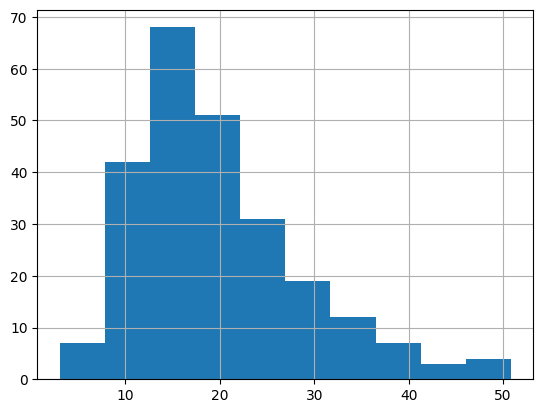

In [98]:
tips['total_bill'].hist()

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

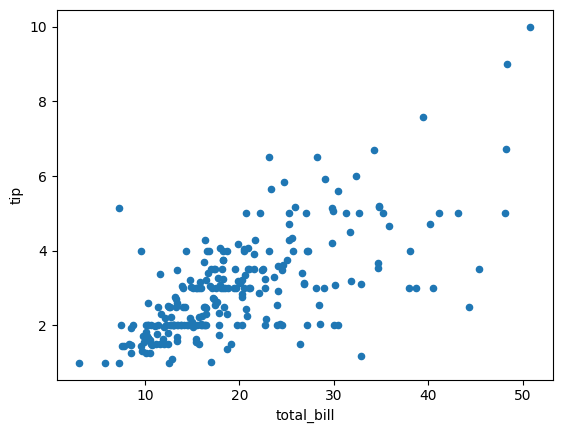

In [97]:
tips.plot.scatter(x='total_bill', y='tip');

### Постройте pairplot

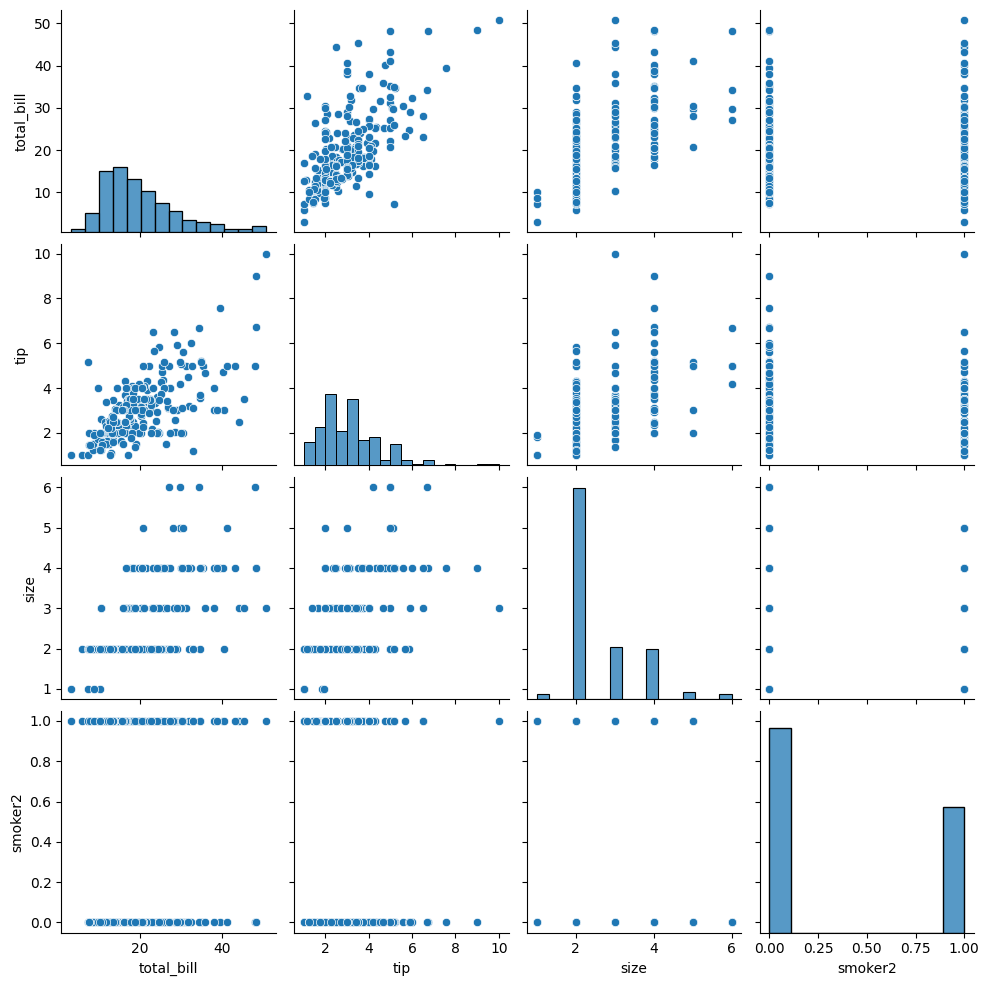

In [100]:
sns.pairplot(tips, height=2.5);

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

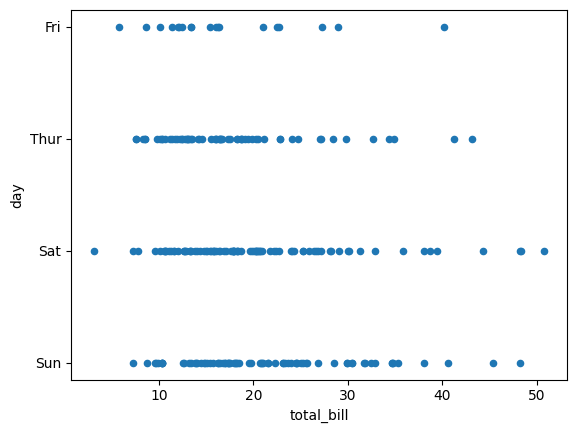

In [106]:
tips.plot.scatter(x='total_bill', y='day');


### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

/var/folders/8y/jrlb4h2x4ddgq5q5wwh6tjb00000gn/T/ipykernel_80714/1004232383.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.plot.hist(column=["tip"], by="time", figsize=(10, 8));
/var/folders/8y/jrlb4h2x4ddgq5q5wwh6tjb00000gn/T/ipykernel_80714/1004232383.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.plot.hist(column=["tip"], by="time", figsize=(10, 8));
/var/folders/8y/jrlb4h2x4ddgq5q5wwh6tjb00000gn/T/ipykernel_80714/1004232383.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current be

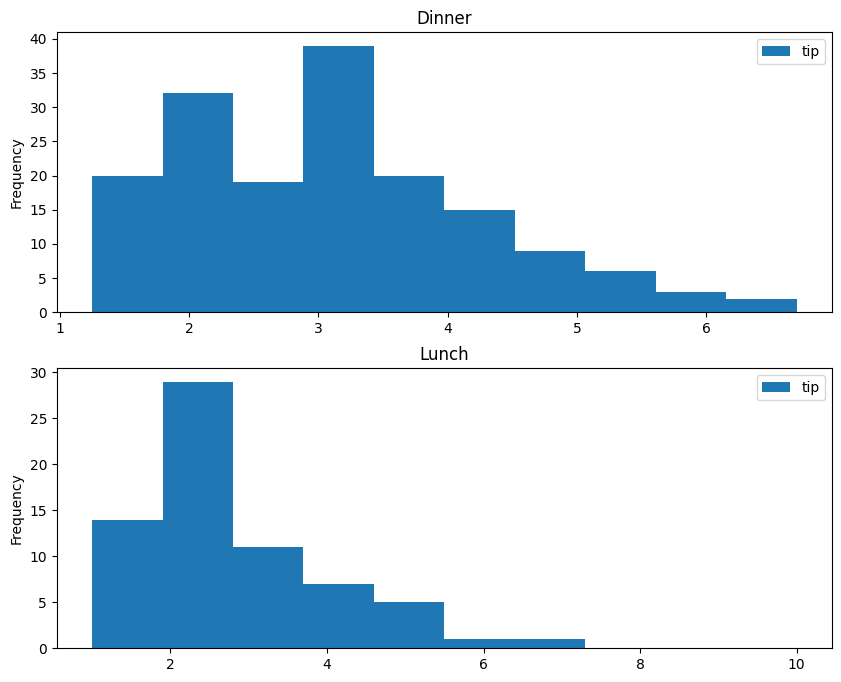

In [118]:
tips.plot.hist(column=["tip"], by="time", figsize=(10, 8));

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

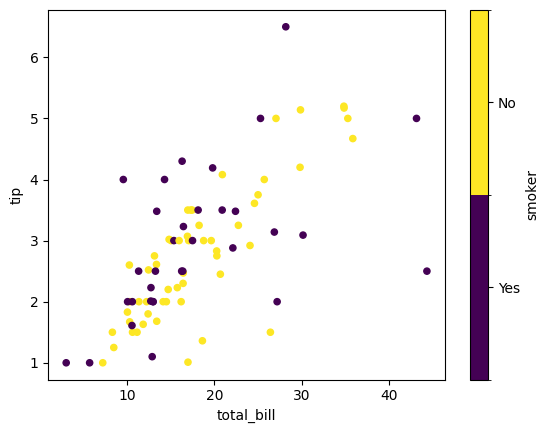

In [141]:
tips[tips['sex']=='Male'].plot.scatter(x='total_bill', y='tip', c='smoker',colormap='viridis');

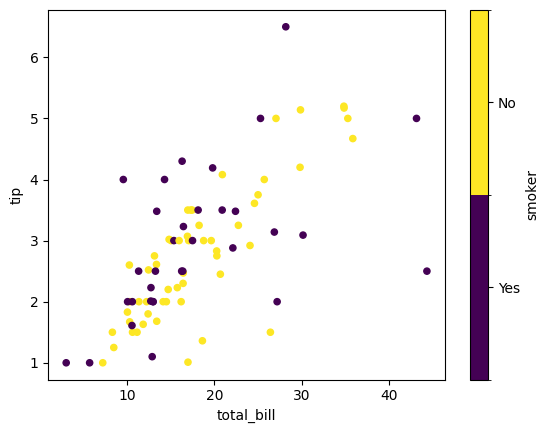

In [150]:
tips[tips['sex']=='Female'].plot.scatter(x='total_bill', y='tip',  c='smoker',colormap='viridis');

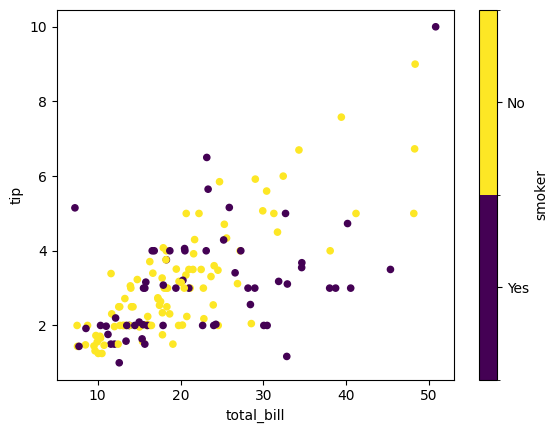

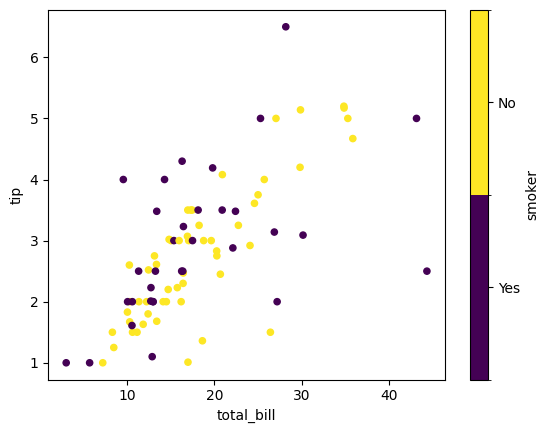

In [148]:
tips.groupby('sex',observed=False).plot.scatter(x='total_bill', y='tip', c='smoker',colormap='viridis');


## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

### выводы по графикам из задания
Итоговое значение чека меняется от 3 до 50 единиц. Их соотношение в 17 раз не очень большое.
Выборка включает в себя 4 дня, в будние средний чек чуть меньше (20%) чем в выходные. Разница между четвергом и пятницей, меньше чем между субботой и воскресеньем
 